# 1. Artificial Neural Networks

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
import math

%matplotlib inline

In [2]:
toNodes = range(3, 5)
fromNodes = range(0, 2)

In [3]:
bias       = [0.2, -0.1, 0.5, 0.1, 0.4, 0.9]
activation = [0.8, -0.3, -0.8, 0.1, 0.5]
netInput   = [0, 0, 0, 0, 0]
weight = [[ 0.1, -0.8], 
          [-0.3,  0.1], 
          [ 0.2, -0.1], 
          [ 0.0,  0.1], 
          [ 0.8, -0.8], 
          [ 0.4, 0.5]]

In [4]:
for i in toNodes:
    netInput[i] = bias[i]
    for j in fromNodes:
        netInput[i] += (weight[i][j] * activation[j]) 
netInput

[0, 0, 0, 0.07, 1.28]

where `weight[i][j]` is the weight $w_{ij}$, or connection strength, from the $j^{th}$ node to the $i^{th}$ node, `activation[j]` is the activation signal $x_j$ of the $j^{th}$ input node, and `bias[i]` is the bias value $b_i$ of the $i^{th}$ node. 

After computing the net input, each node has to compute its output activation. The value that results from applying the activation function to the net input is the signal that will be sent as output to all the nodes in the next layer. The **activation function** used in backprop networks is generally:

$$ a_i = \sigma(net_i) $$

where 

$$ \sigma(x) = \dfrac{1}{1 + e^{-x}} $$

The method math.exp() returns returns exponential of x: $e^{x}$.

In [5]:
def activationFunction(netInput):
    return 1.0 / (1.0 + math.exp(-netInput))

Now we can compute the complete activation of a unit:

In [6]:
for i in toNodes:
    activation[i] = activationFunction(netInput[i])
activation

[0.8, -0.3, -0.8, 0.5174928576663897, 0.7824497764231124]

This $\sigma$ is the activation function, as shown in the plot below. Notice that the function is monotonically increasing and bounded by 0.0 and 1.0 as the net input approaches negative infinity and positive infinity, respectively.

In [7]:
xs = range(-10, 10)
pts = [activationFunction(x) for x in xs]

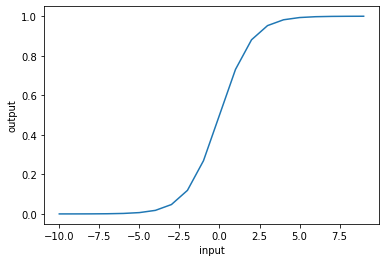

In [8]:
plt.plot(xs, pts)
plt.xlabel("input")
plt.ylabel("output")
plt.show()

## 1.4 How to set the weights?

For many years, it was unknown how to learn the weights in a multi-layered neural network. In addition, Marvin Minsky and Seymour Papert proved in their 1969 book [Perceptrons](https://en.wikipedia.org/wiki/Perceptrons_(book)) that you could not do simple functions without having multi-layers. (Actually, the idea of using simulated evolution to search for the weights could have been used, but no one thought to do that.) 

Specifically, they looked at the function XOR:

**Input 1** | **Input 2** | **Target**
------------|-------------|-------
 0 | 0 | 0
 0 | 1 | 1 
 1 | 0 | 1 
 1 | 1 | 0 

This killed research into neural networks for more than a decade. So, the idea of neural networks generally was ignored until the mid 1980s when the **Back-Propagation of Error** (backprop) was created.

## 1.5 Learning Rule

Backprop networks fall under the category of *supervised learning* schemes. That is, during training, the network is presented a training input, the inputs are propagated using the transfer function, until output appears in the output layer. The output is then compared with the expected or target output and an error is computed. The error is then backpropagated by applying the learning rule. 

A learning rule modifies the weights between nodes. The backpropagation algorithm, also called the *generalized delta rule*, systematically changes the weights by using a weight change equation. We use an optional momentum term in the weight change rule to help speed up convergence. The weight change rule is different for weights between the hidden-output layer nodes and the input-hidden layer nodes. For the hidden-output layer nodes it is:

In [9]:
desiredOutput = [0.1, 0.2, 0.3, 0.4, 0.5]
actualOutput = [0.8, 0.6, 0.5, 0.8, 0.3]

error = [0.0 for i in desiredOutput]
delta = [0.0 for i in desiredOutput]

EPSILON = 0.1   # learning rate
MOMENTUM = 0.01 # a smoothing term

weightUpdate = [[ 0.0, 0.0], 
                [ 0.0, 0.0], 
                [ 0.0, 0.0], 
                [ 0.0, 0.0], 
                [ 0.0, 0.0], 
                [ 0.0, 0.0]]

And the learning rule applied:

In [13]:
for i in toNodes:
    error[i] = (desiredOutput[i] - actualOutput[i])
    delta[i] = error[i] * actualOutput[i] * (1 - actualOutput[i])
    for j in fromNodes:
        weightUpdate[i][j] = (EPSILON * delta[i] * actualOutput[j]) + (MOMENTUM * weightUpdate[i][j])
        
weightUpdate

[[0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [-0.005171200000000001, -0.0038784],
 [0.0033936, 0.0025451999999999996],
 [0.0, 0.0]]

That is, at the $i^{th}$ output node, the error is the difference between desired and actual outputs. The weight change between a hidden layer node $j$ and output node $i$ --- `weightUpdate[i][j]` --- is a fraction of the computed delta value and additionally a fraction of the weight change from the previous training step. MOMENTUM is a constant that ranges between 0.0 and 1.0 and **EPSILON** is called the **learning rate** and is also a constant that varies between 0.0 and 1.0.

In the above code `delta[i] * actualOutput[j]` is the partial derivative of the overall error with respect to each weight. This is the slope of error. Thus, backprop changes the weight a tiny portion of the slope of the error. We only know the slope of this curve, not the shape, and thus have to take very small steps.

And that is all of the math, and Python, necessary to train a back-propagation of error neural network. Even though this is a very simple formulation, it has been proved that such three-layer network (input, hidden, output) is capable of computing any function that can be computed (Franklin and Garzon).


To make coding these networks easier (and faster, using matrix multiplication) we have created a Python library called `conx`.

## 1.6 Training a Neural Network

Given a task, how does one train a neural network to do/solve the task? This involves the following steps:

 1. Determine an appropriate network architecture.
 1. Define a data set that will be used for training.
 1. Define the neural network parameters to be used for training.
 1. Train the network.
 1. Test the trained network.
 1. Do post training analysis.

### 1.6.1 Determining an appropriate architecture

Recall that a neural network consists of an input layer, an output layer, and zero or more hidden layers. Once a network has been trained, when you present an input to the network, the network will propagate the inputs through its layers to produce an output (using the transfer function described above). If the input represents an instance of the task, the output should be the solution to that instance after the network has been trained. Thus, one can view a neural network as a general pattern associator. Thus, given a task, the first step is to identify the nature of inputs to the pattern associator. This is normally in the form of number of nodes required to represent the input. Similarly, you will need to determine how many output nodes will be required. For example, consider a simple logical connective, AND whose input-output characteristics are summarized in the table below:

**Input A** | **Input B** | **Target**
------------|-------------|-------
 0 | 0 | 0
 0 | 1 | 0 
 1 | 0 | 0 
 1 | 1 | 1 

This is a very simple example, but it will help us illustrate all of the important concepts in defining and training neural networks.

In this example, it is clear that we will need two nodes in the input layer, and one in the output layer. We can start by assuming that we will not need a hidden layer. In general, as far as the design of a neural network is concerned, you always begin by identifying the size of the input and output layers. Then, you decide how many hidden layers you would use. In most situations you will need one hidden layer, though there are no hard and fast rules about its size. Through much empirical practice, you will develop your own heuristics about this. We will return to this issue later. In the case of the AND network, it is simple enough that we have decided not to use any hidden layers.

### 1.6.2 Define a data set that will be used for training

Once you have decided on the network architecture, you have to prepare the data set that will be used for training. Each item in the data set represents an input pattern and the correct output pattern that should be produced by the network (since this is supervised training). In most tasks, there can be an infinite number of such input-output associations. Obviously it would be impossible to enumerate all associations for all tasks (and it would make little sense to even try to do this!). You have to then decide what comprises a good representative data set that, when used in training a network, would generalize to all situations.

In the case of the AND network, the data set is very small, finite (only 4 cases!), and exhaustive.

The other issue you have to take into consideration here is that of the range of each input and output value. Remember the transfer function of a node is a sigmoid-function that serves to squash all input values between 0.0 and 1.0. Thus, regardless of the size of each input value into a node, the output produced by each node is between 0.0 and 1.0. This means that all output nodes have values in that range. If the task you are dealing with expects outputs between 0.0 and 1.0, then there is nothing to worry about. However, in most situations, you will need to *scale* the output values back to the values in the task domain. 

In reality, it is also a good idea to scale the input values from the domain into the 0.0 to 1.0 range (especially if most input values are outside the -5.0 and 5.0 range). Thus, defining a data set for training almost always requires a collection of input-output pairs, as well as scaling and unscaling operations. Luckily, for the AND task, we do not need to do any scaling, but we will see several examples of this later.

### 1.6.3 Define the neural network parameters

The next step is to define the parameters required to train the neural network. These include the following:

 1. The learning constant
 1. The momentum constant
 1. The tolerance
 1. Other training-related parameters

The learning rate, EPSILON, and the momentum constant, MOMENTUM, have to be between 0.0 and 1.0 and are critical to the overall training algorithm. The appropriate values of these constants are best determined by experimentation. Tolerance (which is also between 0.0 and 1.0) refers to the level of tolerance that is acceptable for determining correctness of the output. For example, if tolerance is set to 0.1, then an output value within 10% of the desired output is considered correct. Other training parameters generally exist to specify the reporting rate of the progress of the training, where to log such progress, etc. We will see specific examples of these as we start working with actual networks.

For the AND network, we will set EPSILON to 0.5, MOMENTUM to 0.0, report the progress every 5 epochs (see below).

### 1.6.4 Train the network

Once all the parameters are specified, you start the training process. This involves presenting each input pattern to the network, propagating it all the way until an output is produced, comparing the output with the desired target, computing the error, backpropagating the error, and applying the learning rule.  This process is repeated  until all inputs are exhausted. A single pass through an entire data set is called an *epoch*. In general, you always train the network for several epochs (can be anywhere from a few hundred to millions!) until the network begins to show more improved and stable performance. Performance of the network is generally measured in terms of the *total sum-squared error* or *TSS* for short. This is the error in each pattern squared and summed over all the patterns. Initially, you will notice that the TSS is quite high, but it will slowly decrease as the number of epochs increase. 

You can either stop the training process after a certain number of epochs have elapsed, or after the TSS has decreased to a specific amount.

### 1.6.5 Test the trained network

Once the network has been trained, it is time to test it. There are several ways of doing this. Perhaps the easiest is to turn learning off (another training parameter) and then see the outputs produced by the network for each input in the data set. When a trained network is going to be used in a *deployed* application, all you have to do is save the weights of all interconnections in the network into a file. The trained network can then be recreated at anytime by reloading the weights.

Note: Instead of training-then-testing, there is another methodology: you can test-while-training. Conx's neural network system supports the idea of **cross validation**. With cross validation one defines a training corpus and testing corpus at the beginning. Occasionally, as training proceeds on the training corpus, the system will stop training momentarily (by turning learning off) and test its current weights on the test corpus. This methodology has the advantage of being able to stop when performance on the test corpus begins to drop, thereby preventing over-training. See [Conx Implementation Details]() for more details on cross validation.

### 1.6.6 Do post training analysis

Perhaps the most important step in using neural networks is the analysis one performs once a network has been trained. There are a whole host of analysis techniques, we will present some of them as we go along.

Next, we will introduce you to the Python package called, `conx` that is used to create and experiment with neural networks. We will use the AND network example from this section to learn about conx.

# 2. Learning AND

Consider the AND function:

**Input A** | **Input B** | **Target**
------------|-------------|-------
 0 | 0 | 0
 0 | 1 | 0 
 1 | 0 | 0 
 1 | 1 | 1

First, we import all of the items from the `conx` library:

In [16]:
from calysto.ai.conx import *

For the AND experiment, we will create a 2-3-1 network:

* input layer of two units
* hidden layer of three (arbitrary, but not too big)
* output layer of one unit

In [17]:
net = Network()
net.addLayers(2, 3, 1)
net

Conx using seed: 1649792371.2378194


Layer 'output': (Kind: Output, Size: 1, Active: 1, Frozen: 0)
Target    : 0.00  
Activation: 0.00  
Layer 'hidden': (Kind: Hidden, Size: 3, Active: 1, Frozen: 0)
Activation: 0.00  0.00  0.00  
Layer 'input': (Kind: Input, Size: 2, Active: 1, Frozen: 0)
Activation: 0.00  0.00  

We can propagate activation through the network (from input layer, through the hidden layer, to output layer):

In [18]:
net.propagate(input=[0, 0])

array('d', [0.4932597949390636])

To see how an untrained network works on the AND problem, we can just propagate the input activations for each input pattern:

In [19]:
for pattern in [[0, 0], [0, 1], [1, 0], [1, 1]]:
    print(pattern, net.propagate(input=pattern))

[0, 0] array('d', [0.4932597949390636])
[0, 1] array('d', [0.49297150210742524])
[1, 0] array('d', [0.4934311067623621])
[1, 1] array('d', [0.493142975568295])


Now, let's train a network to determine the weights to compute the AND function:

In [20]:
# provide training patterns (inputs and outputs)
net.setInputs([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0],[1.0, 1.0]])
net.setOutputs([[0.0],[0.0],[0.0],[1.0]])

# set learning parameters
net.setEpsilon(0.5)
net.setTolerance(0.2)
net.setReportRate(1)

# learn
net.train()

Epoch #     1 | TSS Error: 1.0489 | Correct: 0.0000 | RMS Error: 0.5121
Epoch #     2 | TSS Error: 1.0271 | Correct: 0.0000 | RMS Error: 0.5067
Epoch #     3 | TSS Error: 0.8033 | Correct: 0.7500 | RMS Error: 0.4481
Epoch #     4 | TSS Error: 0.8614 | Correct: 0.7500 | RMS Error: 0.4641
Epoch #     5 | TSS Error: 0.8613 | Correct: 0.7500 | RMS Error: 0.4640
Epoch #     6 | TSS Error: 0.7501 | Correct: 0.7500 | RMS Error: 0.4330
Epoch #     7 | TSS Error: 0.7534 | Correct: 0.2500 | RMS Error: 0.4340
Epoch #     8 | TSS Error: 0.6998 | Correct: 0.0000 | RMS Error: 0.4183
Epoch #     9 | TSS Error: 0.7015 | Correct: 0.0000 | RMS Error: 0.4188
Epoch #    10 | TSS Error: 0.7163 | Correct: 0.0000 | RMS Error: 0.4232
Epoch #    11 | TSS Error: 0.7061 | Correct: 0.0000 | RMS Error: 0.4202
Epoch #    12 | TSS Error: 0.6801 | Correct: 0.2500 | RMS Error: 0.4123
Epoch #    13 | TSS Error: 0.6392 | Correct: 0.2500 | RMS Error: 0.3997
Epoch #    14 | TSS Error: 0.5958 | Correct: 0.2500 | RMS Error:

It should be pretty easy to learn this function, taking around 10 to 20 cycles through the 4 training patterns (called an **epoch**). We can test each input pattern to see if it really works:

In [21]:
for pattern in [[0, 0], [0, 1], [1, 0], [1, 1]]:
    print(pattern, net.propagate(input=pattern))

[0, 0] array('d', [0.0004404983243821034])
[0, 1] array('d', [0.10400586790703523])
[1, 0] array('d', [0.08549461967851019])
[1, 1] array('d', [0.8577884508536319])


Yes! It really works. But it gets even better.

## 2.1 Generalization

One of the great side benefits of using a neural network to solve a problem is that it can also do slightly different problems that it was not trained on.

For example, we didn't explicitly train the network on [0.8, 0.8] for the AND problem, but we can see what the network thinks:

In [22]:
net.propagate(input=[0.8, 0.8])

array('d', [0.7205753811234459])

That is a reasonable answer. To see all of the reasonable answers, we can sample the entire input space for the two input units:

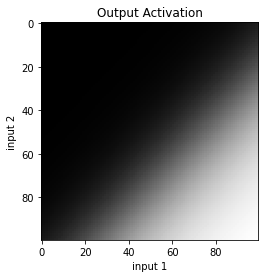

In [23]:
z = np.zeros((100, 100))

for x in range(100):
    for y in range(100):
        z[x][y] = net.propagate(input=[x/100, y/100])[0]

plt.imshow(z, cmap=plt.cm.gray, interpolation='nearest')
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.title("Output Activation")

plt.show()